## Deep dream with Perlin noise

To get started, make sure all of the folloing import statements work without error. You should get a message telling you there are 59 layers in the network and 7548 channels.

In [1]:
from __future__ import print_function
from io import BytesIO
import math, time, copy, json, os
import glob
from os import listdir
from os.path import isfile, join
from random import random
from enum import Enum
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
 

In [2]:
def plt_img(img):
    plt.figure(figsize=(6, 6))
    plt.axis("off")
    plt.imshow(img)
    plt.colorbar()
    plt.show()

In [3]:
import ctypes
import noise
from noise import pnoise3, snoise3


ImportError: No module named noise

In [4]:
noise_3D=np.zeros((400,400,100))
scale=0.01
zscale=0.1
half=scale*400/2
halfz=zscale*100/2
for z in range(100):
    for y in range(400):
        for x in range(400):
                v = snoise3(x * scale - half, y * scale - half, z * zscale - halfz, octaves=4, persistence=0.25)
                noise_3D[x,y,z] = int(v * 127.0+127)
    img=noise_3D[:,:,z];
    a = np.uint8(np.clip(img, 0, 255))
    img2=PIL.Image.fromarray(a) 
    img2.save('../results/noise_frames/frame%04d.png'%z)

In [8]:
frames_dir = '../results/noise_frames'
video_path = '../results/noise_video/noise.mp4'

cmd = 'ffmpeg -i %s/frame%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)
print(cmd)
os.system(cmd)

ffmpeg -i ../results/noise_frames/frame%04d.png -c:v libx264 -pix_fmt yuv420p ../results/noise_video/noise.mp4


0

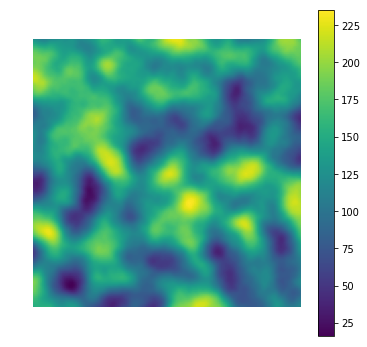

In [9]:
plt_img(noise_3D[:,:,0])